In [1]:
import urllib
import os
DOWNLOAD_URL = "https://www.openml.org/data/get_csv/52667/mnist_784.arff"

In [12]:
import pandas as pd

def load_data():
    return pd.read_csv(DOWNLOAD_URL)

**Retrieve and load the mnist_784 dataset of 70,000 instances.**

In [13]:
mnist_data = load_data()

In [18]:
mnist_data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [25]:
mnist_data['class'].describe()

count    70000.000000
mean         4.452429
std          2.890195
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: class, dtype: float64

**Display each digit.**

In [35]:
def show_each_digits():    
    for i in range(10):
        print("Digit Number: ", i)
        print(mnist_data.loc[mnist_data['class']==i].head(1))
        print()

show_each_digits()

Digit Number:  0
   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
1       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
1        0  ...         0         0         0         0         0         0   

   pixel782  pixel783  pixel784  class  
1         0         0         0      0  

[1 rows x 785 columns]

Digit Number:  1
   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
3       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
3        0  ...         0         0         0         0         0         0   

   pixel782  pixel783  pixel784  class  
3         0         0         0      1  

[1 rows x 785 columns]

Digit Number:  2
   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
5       0       0       0     

In [117]:
mnist_data_x,mnist_data_y = mnist_data.iloc[:, :-1], mnist_data.iloc[:, [-1]]

**Use PCA to retrieve the 1th and 2ndprincipal component and output their explained variance ratio.**

In [88]:
from sklearn.decomposition import PCA

pca = PCA()
mnist_x2d = pca.fit_transform(mnist_data_x)

In [89]:
print("First explained variance ratio: ",pca.explained_variance_ratio_[0])
print("Second explained variance ratio: ",pca.explained_variance_ratio_[1])

First explained variance ratio:  0.0974611592249476
Second explained variance ratio:  0.07155444586878713


**Plot the projections of the 1th and 2nd principal component onto a 1D hyperplane.**

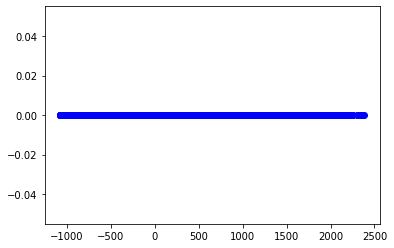

In [93]:
import matplotlib.pyplot as pl
import numpy as np

# first_variance = []
# for i in mnist_x2d[:,0]:
#     if i==pca.explained_variance_ratio_[0]:
#         print(i)
#         first_variance.append(i)

pl.scatter(mnist_x2d[:,0],np.zeros(len(mnist_x2d[:,0])),color='blue')
pl.show()

**Use Incremental PCA to reduce the dimensionality of the MNIST dataset down to 154 dimensions.**

In [94]:
from sklearn.decomposition import IncrementalPCA

n_batch = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(mnist_data_x, n_batch):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(mnist_data_x)

**Display the original and compressed digits from**

In [128]:
# First Data Frame before the reduction in dimmention of the Data from 784 to 154.
print("Before Reduction in Dimention: ")
mnist_data_x.head()

Before Reduction in Dimention: 


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
# First Data Frame after the reduction in dimmention of the Data from 784 to 154.
print("After Reduction in Dimention: ")
pd.DataFrame(X_reduced).head()

After Reduction in Dimention: 


,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
0,122.255007,316.233645,51.131782,556.897593,-49.209378,-217.068754,233.712684,188.824287,-358.799779,203.544286,...,73.805908,-16.414691,32.917062,-23.401677,-11.305323,-45.639076,-10.121299,79.549787,70.817891,9.171330
1,1010.494459,289.964470,-576.120818,485.084205,-841.478633,-145.467420,-48.332524,-102.230718,34.785537,151.268239,...,5.740897,87.701681,1.006155,-4.644288,48.814448,46.999776,28.936237,24.447860,-50.076869,39.407491
2,-58.995999,-393.698047,161.997245,-529.220864,-313.159458,8.969471,-860.992353,374.290772,-78.502189,-192.723700,...,47.918900,5.516353,-101.754567,-44.185629,-40.866251,58.531564,65.020376,56.436546,-87.922680,-17.832396
3,-796.965195,607.421156,-295.522597,-109.112483,25.665906,697.860914,-474.507036,-99.776449,298.604314,4.532157,...,58.669210,-0.711161,18.674953,-48.264480,-11.143099,20.127117,4.424049,36.464501,-11.329792,-9.154312
4,-391.318636,-729.803919,-13.906725,242.894328,98.772859,35.925972,-87.458847,-415.777784,200.296995,106.210314,...,-25.125066,42.433843,-67.085358,19.440697,-26.296431,-11.454922,50.796205,-7.347689,63.831273,-47.843911


### Question 2

**1. Generate Swiss roll dataset.**

In [137]:
from sklearn.datasets import make_swiss_roll

swiss_X, swiss_y = make_swiss_roll(n_samples=1000, noise=0.0, random_state=None)

**2. Plot the resulting generated Swiss roll dataset.**

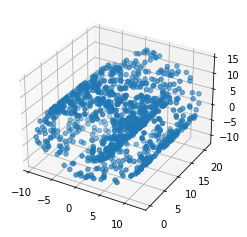

In [153]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(swiss_X[:,0], swiss_X[:,1], swiss_X[:,2]);

**3. Use Kernel PCA (kPCA) with linear kernel , a RBF kernel , and a sigmoid kernel**

In [157]:
from sklearn.decomposition import KernelPCA

linear_kernal = KernelPCA(n_components=2,kernel="linear")
swiss_linear_X_transformed = linear_kernal.fit_transform(swiss_X)

rbf_kernel = KernelPCA(n_components=2,kernel="rbf")
swiss_rbf_X_transformed = rbf_kernel.fit_transform(swiss_X)

sigmoid_kernal = KernelPCA(n_components=2,kernel="sigmoid")
swiss_sigmoid_X_transformed = sigmoid_kernal.fit_transform(swiss_X)

**4. Plot the kPCA results of applying the linear kernel , a RBF kernel , and a sigmoid kernel from (3). Explain and compare the results**

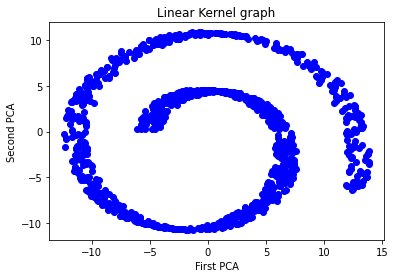

In [163]:
plt.title("Linear Kernel graph")
pl.xlabel("First PCA")
pl.ylabel("Second PCA")
pl.scatter(swiss_linear_X_transformed[:,0],swiss_linear_X_transformed[:,1],color='blue')
pl.show()

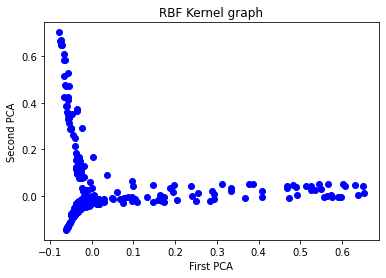

In [164]:
plt.title("RBF Kernel graph")
pl.xlabel("First PCA")
pl.ylabel("Second PCA")
pl.scatter(swiss_rbf_X_transformed[:,0],swiss_rbf_X_transformed[:,1],color='blue')
pl.show()

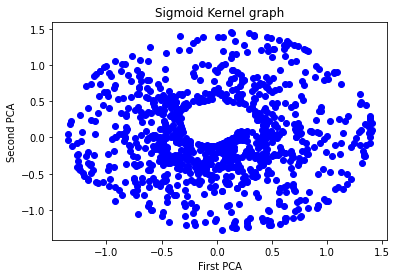

In [165]:
plt.title("Sigmoid Kernel graph")
pl.xlabel("First PCA")
pl.ylabel("Second PCA")
pl.scatter(swiss_sigmoid_X_transformed[:,0],swiss_sigmoid_X_transformed[:,1],color='blue')
pl.show()

**5. Using kPCA and a kernel of your choice, apply Logistic Regression for classification. Use GridSearchCV to find the best kernel and gamma value for kPCA in order to get the best classification accuracy at the end of the pipeline. Print out best parameters found by GridSearchCV.**

In [168]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("kPCA", KernelPCA(n_components=2)),
    ("log_reg",LogisticRegression())
])

param_grid = [{
    "kPCA__gamma":np.linspace(0.03,0.05,10),
    "kPCA__kernel": ['rbf','sigmoid']
}]

grid_search = GridSearchCV(clf,param_grid, cv=3)
grid_search.fit(swiss_X,swiss_y)

/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Esti

/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Esti

/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Esti

/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Esti

/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Esti

/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Esti

/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/home/jainil/ml/my_env/lib/python3.9/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Esti

ValueError: Unknown label type: 'continuous'

In [166]:
print(grid_search.best_params_)

NameError: name 'grid_search' is not defined

**6. Plot the results from using GridSearchCV in (2).**